<a href="https://colab.research.google.com/github/sak1b0/proteiNN/blob/master/forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import losses
import pandas as pd
import numpy as np
from numpy import argmax
import matplotlib.pyplot as plt
import time

prop = {1:[1.8,-0.17,0.11,0,0.38,-0.21,-1.6,0.42,-0.27,1.12,0.61],
18:[-4.5,-0.81,2.58,3.71,-2.57,2.11,12.3,-1.56,1.87,-2.55,0.6],
14:[-3.5,-0.42,2.05,3.47,-1.62,0.96,4.8,-1.03,0.81,-0.83,0.06],
4:[-3.5,-1.23,3.49,2.95,-3.27,1.36,9.2,-0.51,0.81,-0.83,0.46],
3:[2.5,0.24,-0.13,0.49,-0.3,-6.04,-2,0.84,-1.05,0.59,1.07],
17:[-3.5,-0.58,2.36,3.01,-1.84,1.52,4.1,-0.96,1.1,-0.78,0],
5:[-3.5,-2.02,2.68,1.64,-2.9,2.3,8.2,-0.37,1.17,-0.92,0.47],
7:[-0.4,-0.01,0.74,1.72,-0.19,0,-1,0,-0.16,1.2,0.07],
8:[-3.2,-0.96,2.06,4.76,-1.44,-1.23,3,-2.28,0.28,-0.93,0.61],
9:[4.5,0.31,-0.6,-1.56,1.97,-4.81,-3.1,1.81,-0.77,1.16,2.22],
12:[3.8,0.56,-0.55,-1.81,1.82,-4.68,-2.8,1.8,-1.1,1.18,1.53],
11:[-3.9,-0.99,2.71,5.39,-3.46,3.88,8.8,-2.03,1.7,-0.8,1.15],
13:[1.9,0.23,-0.1,-0.76,1.4,-3.66,-3.4,1.18,-0.73,0.55,1.18],
6:[2.8,1.13,-0.32,-2.2,1.98,-4.65,-3.7,1.74,-1.43,0.67,2.02],
16:[-1.6,-0.45,2.23,-1.52,-1.44,0.75,0.2,0.86,-0.75,0.54,1.95],
19:[-0.8,-0.13,0.84,1.83,-0.53,1.74,-0.6,-0.64,0.42,-0.05,0.05],
20:[-0.7,-0.14,0.52,1.78,-0.32,0.78,-1.2,-0.26,0.63,-0.02,0.05],
23:[-0.9,1.85,0.3,-0.38,1.53,-3.32,-1.9,1.46,-1.57,-0.19,2.65],
25:[-1.3,0.94,0.68,-1.09,0.49,-1.01,0.7,0.51,-0.56,-0.23,1.88],
22:[4.2,-0.07,-0.31,-0.78,1.46,-3.5,-2.6,1.34,-0.4,1.13,1.32],
26:[0,0,0,0,0,0,0,0,0,0,0]}

df_train=np.asarray(pd.read_csv('https://raw.githubusercontent.com/sak1b0/proteiNN/master/train_formatted.csv',header=None))
df_test=np.asarray(pd.read_csv('https://raw.githubusercontent.com/sak1b0/proteiNN/master/test_formatted.csv',header=None))

x_train = df_train[:,0]
y_train = df_train[:,1]

x_test = df_test[:,0]
y_test = df_test[:,1]

def debug_me():
  #print('train dataframe: ',df_train.shape)
  print('x_train shape: ',x_train.shape)
  print('y_train shape: ',y_train.shape)

  #print('test dataframe: ',df_test.shape)
  print('x_test shape: ',x_test.shape)
  print('y_test shape: ',y_test.shape)

max_len=400

#================== x_train ===============
n = x_train
j=-1

for i in x_train:
  j=j+1
  if(len(i)>max_len):
    n = np.delete(n, j)
    j=j-1

for item in range (len(n)):
  n[item] = n[item]+'Z'*(max_len-len(n[item]))

x_train = n

#================= y_train =================
n = y_train
j=-1

for i in y_train:
  j=j+1
  if(len(i)>max_len):
    n = np.delete(n, j)
    j=j-1

for item in range (len(n)):
  n[item] = n[item]+'Z'*(max_len-len(n[item]))
    
y_train = n
#=================  x_test ==================
n = x_test
j=-1

for i in x_test:
  j=j+1
  if(len(i)>max_len):
    n = np.delete(n, j)
    j=j-1

for item in range (len(n)):
  n[item] = n[item]+'Z'*(max_len-len(n[item]))

x_test = n
#=================  y_test ==================
n = y_test
j=-1

for i in y_test:
  j=j+1
  if(len(i)>max_len):
    n = np.delete(n, j)
    j=j-1

for item in range (len(n)):
  n[item] = n[item]+'Z'*(max_len-len(n[item]))

y_test = n

#============= selected data withing range===========


max_len = max([len(i) for i in x_train])
#print(max_len)

max_len = max([len(i) for i in y_test])
#print(max_len)

print('starting the preprocessing\n')
start_time = time.time()

#==============   Properties Encoded start  ============================

# ==========x_train conversion start====
s = list(x_train)

k = []

for i in range(len(s)):
  t=[]
  for item in range(len(s[i])):
    t.append(prop[ord(s[i][item])-64])
  k.append(t)


x_train = np.array(k)

#=========== x_train conversion end ====

#=========== x_test conversion start====
s = list(x_test)

k = []

for i in range(len(s)):
  t=[]
  for item in range(len(s[i])):
    t.append(prop[ord(s[i][item])-64])
  k.append(t)


x_test = np.array(k)

#============= x_test conversion end====


#==============   Properties Encoded end  ============================



#==============   ONE_HOT   ===================================================

#======= y_train start========
#y_train = y_train[0:3]

alphabet = 'CEHXZ'

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

k = []

for i in range(len(y_train)):
  integer_encoded = [char_to_int[char] for char in y_train[i]]
  
  onehot_encoded=list()
  for value in integer_encoded:
	  letter = [0 for _ in range(len(alphabet))]
	  letter[value] = 1
	  onehot_encoded.append(letter)
  
  k.append(onehot_encoded)  

y_train = np.array(k)
#display(y_train)

#======= y_train end========

#======= y_test start========
#y_train = y_train[0:3]

alphabet = 'CEHXZ'

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

k = []

for i in range(len(y_test)):
  integer_encoded = [char_to_int[char] for char in y_test[i]]
  
  onehot_encoded=list()
  for value in integer_encoded:
	  letter = [0 for _ in range(len(alphabet))]
	  letter[value] = 1
	  onehot_encoded.append(letter)
  
  k.append(onehot_encoded)  

y_test = np.array(k)
#display(y_train)

#======= y_test end========

#==============   ONE_HOT   finish ============================

print('ending the preprocessing\n')
finish_time=time.time()
print ('Time taken to pre-process: ',round(finish_time - start_time,2),' seconds')

#==============   ONE_HOT_INVERSION   =========================================
 
#for i in range(len(y_train[0])):
#  inverted = int_to_char[argmax(y_train[0][i])]
#  print(inverted)

#================ it's time to learn============================
debug_me()
start_time = time.time()
  
model=Sequential()

model.add(LSTM((5),batch_input_shape=(None,400,11),return_sequences=True,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

print(model.input_shape)
print(model.output_shape)

history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

finish_time=time.time()
print ('Time taken to pre-process: ',round((finish_time - start_time)/60,2),' minutes')


starting the preprocessing

ending the preprocessing

Time taken to pre-process:  7.03  seconds
x_train shape:  (4061, 400, 11)
y_train shape:  (4061, 400, 5)
x_test shape:  (1058, 400, 11)
y_test shape:  (1058, 400, 5)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 400, 5)            340       
Total params: 340
Trainable params: 340
Non-trainable params: 0
_________________________________________________________________
(None, 400, 11)
(None, 400, 5)
Train on 4061 samples, validate on 1058 samples
Epoch 1/10
4061/4061 [==============================] - 81s 20ms/step - loss: 2.3768 - acc: 0.6347 - val_loss: 2.2016 - val_acc: 0.7223
Epoch 2/10
4061/4061 [==============================] - 81s 20ms/step - loss: 2.0992 - acc: 0.7088 - val_loss: 1.9135 - val_acc: 0.7255
Epoch 3/10
4061/4061 [==============================] - 79s 20ms/step - loss: 1.7546 - acc: 0.7099 - 

In [0]:
y_pred = model.predict(x_test)


array([1, 0, 0, 0, 0])

array([0.30480132, 0.09687482, 0.24366122, 0.01779793, 0.        ],
      dtype=float32)

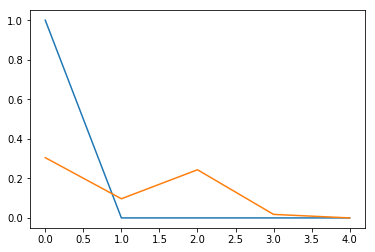

In [52]:
import random as rnd
row=rnd.randint(1,500)
clm=rnd.randint(1,200)

display(y_test[row][clm])
display(y_pred[row][clm])
plt.plot(y_test[row][clm])
plt.plot(y_pred[row][clm])
plt.show()